In [0]:
%matplotlib inline

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

In [0]:
# Calling our modules
import Utils
import Model
import Model_train
import Model_test

In [30]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.RandomHorizontalFlip(),
     #transforms.RandomCrop(32, padding=4),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck truck plane  ship


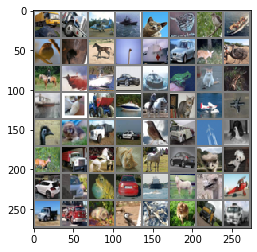

In [31]:


# functions to show an image


# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
#imshow(torchvision.utils.make_grid(images))
Utils.imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [32]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          36,864
       BatchNorm2d-6          [-1, 128, 32, 32]             256
              ReLU-7          [-1, 128, 32, 32]               0
         Dropout2d-8          [-1, 128, 32, 32]               0
         MaxPool2d-9          [-1, 128, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           4,096
           Conv2d-11           [-1, 64, 16, 16]          18,432
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
        Dropout2d-14           [-1

In [0]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [0]:
def model_call(model, device, trainloader, optimizer,testloader, epoch):

  Model_train.train(model, device, trainloader, optimizer, epoch, train_losses, train_acc)
  scheduler.step()
  Model_test.test(model, device, testloader, test_losses, test_acc)

In [35]:
model =  Model.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
EPOCHS = 16


for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1)
  model_call(model, device, trainloader, optimizer,testloader, epoch)

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.8117334842681885 Batch_id=781 Accuracy=48.90: 100%|██████████| 782/782 [00:19<00:00, 45.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0026, Accuracy: 6489/10000 (64.89%)

EPOCH: 2


Loss=0.9063571095466614 Batch_id=781 Accuracy=66.37: 100%|██████████| 782/782 [00:20<00:00, 42.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7908, Accuracy: 7221/10000 (72.21%)

EPOCH: 3


Loss=0.7940644025802612 Batch_id=781 Accuracy=73.12: 100%|██████████| 782/782 [00:19<00:00, 39.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6563, Accuracy: 7758/10000 (77.58%)

EPOCH: 4


Loss=0.49448347091674805 Batch_id=781 Accuracy=79.31: 100%|██████████| 782/782 [00:19<00:00, 39.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5592, Accuracy: 8099/10000 (80.99%)

EPOCH: 5


Loss=0.48972922563552856 Batch_id=781 Accuracy=80.63: 100%|██████████| 782/782 [00:20<00:00, 39.08it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5356, Accuracy: 8157/10000 (81.57%)

EPOCH: 6


Loss=0.3035990595817566 Batch_id=781 Accuracy=81.39: 100%|██████████| 782/782 [00:20<00:00, 38.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5231, Accuracy: 8219/10000 (82.19%)

EPOCH: 7


Loss=0.43338531255722046 Batch_id=781 Accuracy=82.43: 100%|██████████| 782/782 [00:20<00:00, 38.99it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5210, Accuracy: 8216/10000 (82.16%)

EPOCH: 8


Loss=0.7707914113998413 Batch_id=781 Accuracy=82.64: 100%|██████████| 782/782 [00:20<00:00, 40.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5176, Accuracy: 8236/10000 (82.36%)

EPOCH: 9


Loss=0.5858277082443237 Batch_id=781 Accuracy=82.63: 100%|██████████| 782/782 [00:20<00:00, 38.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5154, Accuracy: 8239/10000 (82.39%)

EPOCH: 10


Loss=0.6295881271362305 Batch_id=781 Accuracy=82.65: 100%|██████████| 782/782 [00:20<00:00, 38.42it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5161, Accuracy: 8234/10000 (82.34%)

EPOCH: 11


Loss=0.9614838361740112 Batch_id=781 Accuracy=82.67: 100%|██████████| 782/782 [00:20<00:00, 38.94it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5170, Accuracy: 8244/10000 (82.44%)

EPOCH: 12


Loss=0.5681235790252686 Batch_id=781 Accuracy=82.64: 100%|██████████| 782/782 [00:20<00:00, 38.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5144, Accuracy: 8229/10000 (82.29%)

EPOCH: 13


Loss=0.32520750164985657 Batch_id=781 Accuracy=82.77: 100%|██████████| 782/782 [00:20<00:00, 38.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5148, Accuracy: 8250/10000 (82.50%)

EPOCH: 14


Loss=0.4358300268650055 Batch_id=781 Accuracy=82.87: 100%|██████████| 782/782 [00:20<00:00, 38.20it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5159, Accuracy: 8244/10000 (82.44%)

EPOCH: 15


Loss=0.4511227011680603 Batch_id=781 Accuracy=83.09: 100%|██████████| 782/782 [00:19<00:00, 39.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5161, Accuracy: 8225/10000 (82.25%)

EPOCH: 16


Loss=0.4293571412563324 Batch_id=781 Accuracy=82.91: 100%|██████████| 782/782 [00:20<00:00, 38.91it/s]



Test set: Average loss: 0.5142, Accuracy: 8234/10000 (82.34%)



GroundTruth:  truck  bird   car plane


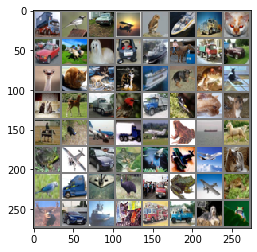

In [36]:
xdataiter = iter(testloader)
images, labels = dataiter.next()

Utils.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [37]:
out_imag =[]
for i, data in enumerate(testloader, 0):
        # get the inputs
        out_imag = data[0].to(device)
outputs = model(out_imag)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse   cat  ship plane


In [38]:
import Utils
# Printing total accuracy
Utils.total_accuracy(testloader,model,device)

Accuracy of the network on the 10000 test images: 82 %


In [39]:
# Printing classwise accuracy
Utils.class_accuracy(testloader, model,device)    

Accuracy of plane : 91 %
Accuracy of   car : 90 %
Accuracy of  bird : 73 %
Accuracy of   cat : 67 %
Accuracy of  deer : 80 %
Accuracy of   dog : 71 %
Accuracy of  frog : 82 %
Accuracy of horse : 87 %
Accuracy of  ship : 87 %
Accuracy of truck : 88 %
